<center><h1 style="font-family:Lucida Console;"> DATA 301 Final Project- Predicting A Volleyball Hitters' Success:</h1></center>

<center>
A major consideration for any athlete when choosing a college is the level of play they want to compete at. JUCO, DIII, NAIA, DII, and DI are all options, each offering different levels of competition and exposure. Some athletes chase the big DI dream, while others take a more realistic or personal approach. The challenge is understanding the differences between these divisions and where an athlete truly fits within this complex system.

For this project, I focus on the offensive side of volleyball, specifically hitting performance. While height and vertical are often emphasized when identifying top hitters, this analysis removes those physical factors by focusing purely on statistical performance. The data includes offensive leader statistics from two conferences: the Big Ten (widely recognized as one of the top DI conferences) and the Crossroads League (one of the most competitive conferences in the NAIA).

This study will explore and predicts a hitter’s Kills per Set (K/S) as key indicator of offensive success. By analyzing volume-based metrics like total attempts and efficiency-based metrics like hitting percentage (PCT), the goal is to identify which factors most strongly predict a player’s K/S and to determine whether those relationships differ between competition levels. Using top hitter statistics from the 2025 season across both the Big Ten and the Crossroads League, this project aims to reveal measurable differences in offensive performance and uncover how player skill and competition level interact across divisions.
</center> 
<hr>

#### <center><b>My Question:</b></center>  <center>How well can we predict a player’s kills per set (K/S) based on their offensive statistics, and does prediction accuracy differ between leagues?</center>
<hr>

<img src="BIGTEN.jpeg" width="150" style="border-radius: 10px; display: block; margin: auto;">
<img src="Crossroads.png" width="300" style="border-radius: 10px; display: block; margin: auto;">


## Data Collection

I got the BIG 10 Volleyball top offensive statistics by just going to their conference site and the statistics link. Once there, I made sure it was on 'offensive' and downloaded it as a PDF, which I then imported it into an Excel spreadsheet. How I did that exactly was I copied and pasted the PDF data into a txt file, which from there I was able to add it into Excel. For the Crossroads league, I went ot the conference page, and then the leaders link. Once there, I went to kills for the targeted statistic and saved the page as a CSV. Then I was able to directly import it into Excel. Once I had the two data pages, I just combined them in a separate sheet. I took the top 50 of the BigTen and the top 50 of Crossroads. 
<hr>
Link To BIG 10: <a href="https://www.openai.com" target="_blank">BIG 10 Stats</a>

Link To Crossroads League: <a href="https://www.crossroadsleague.com/sports/wvball/2025-26/players?pos=of&sort=k" target="_blank">Crossroads League Stats</a>
<hr>

## Cleaning the Data

The biggest part of cleaning the data was just fixes some minor things before I merged the two dataset into one. The first thing was to make sure the headers lined up. The BigTen had a column that had their schools logo, so I deleted that and then the crossroads had a column that said the school so I just got rid of that as well. I made sure that they had everything the same. For example, the Crossroads had assists and assists-per-set before the points where the BigTen had it the other way around. I flipped it so it followed the order the BigTen had. Another thing I noticed was the names of the athletes. The crossroad lists the intital of their first name and then their full last name. BigTen lists the entire name, so I just changed it to be like the crossroads data. Lastly I added three columns. A string column that says what conference they are in ("BigTen" or "Crossroads") and then I added a DI column and NAIA column which are booleans. Then I just saved the entire sheet as a csv to use for this project. 

<b>Important:</b> Because I had to merge the data before doing anything else (and I did that using Excel) I do not really have to do any cleaning features here in the notebook. 

## Loading The Data In

In [4]:
import pandas as pd
df = pd.read_csv("VballStats.csv")
print(df)

    Rank       Level  D1  NAIA         Name  GP  SETS  KILLS  KILL/S    E  \
0      1     Big Ten   1     0     K Martin  29   110    596    5.42  166   
1      2     Big Ten   1     0    K Wollard  30   116    508    4.38  204   
2      3     Big Ten   1     0     M Colyer  28    91    484    5.32  123   
3      4     Big Ten   1     0     A Jacobs  31   114    448    3.93  161   
4      5     Big Ten   1     0  C Leverette  30   112    429    3.83  173   
..   ...         ...  ..   ...          ...  ..   ...    ...     ...  ...   
95    46  Crossroads   0     1   B Spangler  31   109    137    1.26   76   
96    47  Crossroads   0     1    M Hofmann  26    69    130    1.88   61   
97    48  Crossroads   0     1   O Martinez  31   115    125    1.09   67   
98    49  Crossroads   0     1      A Boyer  30    99    120    1.21   45   
99    50  Crossroads   0     1       S Lard  31   109    118    1.08  111   

      TA    PCT    PTS  PTS/S   A   A/S  
0   1339  0.321  684.0   6.22  20

In [5]:
print(df.dtypes)
# Notice the mistake with some of the column types

Rank        int64
Level      object
D1          int64
NAIA        int64
Name       object
GP          int64
SETS        int64
KILLS       int64
KILL/S    float64
E           int64
TA          int64
PCT        object
PTS       float64
PTS/S     float64
A           int64
A/S       float64
dtype: object


When looking at the columns you can see that there are some problems with the column types that are going to need fixing. D1 and NAIA are suppose to be booleans and PCT is suppose to be a float. Lets fix that real quick...

In [6]:
# Fixing D1 and NAIA columns to boolean (previously int)
df["D1"] = df["D1"].astype(bool)
df["NAIA"] = df["NAIA"].astype(bool)

# Fixing PCT column from string to float
df["PCT"] = pd.to_numeric(df["PCT"], errors="coerce")

#Found one data to have a NaN so I fixed it. I went back and found the stat and so I can fill it in with the correct value.
df.loc[92, "PCT"] = -0.05

print(df.dtypes)

Rank        int64
Level      object
D1           bool
NAIA         bool
Name       object
GP          int64
SETS        int64
KILLS       int64
KILL/S    float64
E           int64
TA          int64
PCT       float64
PTS       float64
PTS/S     float64
A           int64
A/S       float64
dtype: object


Great! Now that everything is correct, lets move on to working with the data!

## Example Graph:

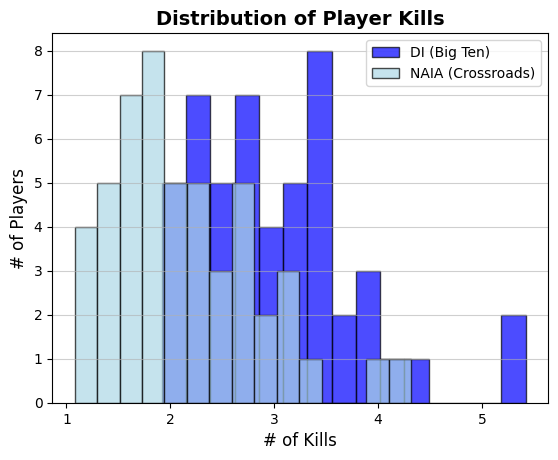

In [7]:
import matplotlib.pyplot as plt

# Plot each group separately. NAIA light blue, DI blue.

#Because the NAIA has smaller values and lighter colors, I did DI first so it will be behind the NAIA bars so we can see both. 
plt.hist(
    df[df["Level"] == "Big Ten"]["KILL/S"], 
    bins=15, color="blue", edgecolor="black", alpha=0.7, 
    label="DI (Big Ten)"
)

plt.hist(
    df[df["Level"] == "Crossroads"]["KILL/S"], 
    bins=15, color="lightblue", edgecolor="black", alpha=0.7, 
    label="NAIA (Crossroads)"
)
# Labels and styling
plt.title("Distribution of Player Kills", fontsize=14, fontweight="bold")
plt.xlabel("# of Kills", fontsize=12)
plt.ylabel("# of Players", fontsize=12)
plt.legend()
plt.grid(axis="y", alpha=0.6)

plt.show()

If you just look at this graph you may think the answer is clear: DI is better they have more kills overall. However, there is more to Vball statistics then just kills and that is what we are going to be exploring. For example, it does not take in the amount of games or sets they have played, attempts they have taken, or errors they have made. So in order to really make that decision lets look at some other graphs.

## Adding Imports

We have already added some previously, but now before we get into everything lets add more imports that we are going to use for our analysis...

In [8]:
# Other Python libraries 
import os
import numpy as np
import seaborn as sns
import random

# Machine learning tools (scikit-learn)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance


## EXTRA GRAPHS TO EXAMINE

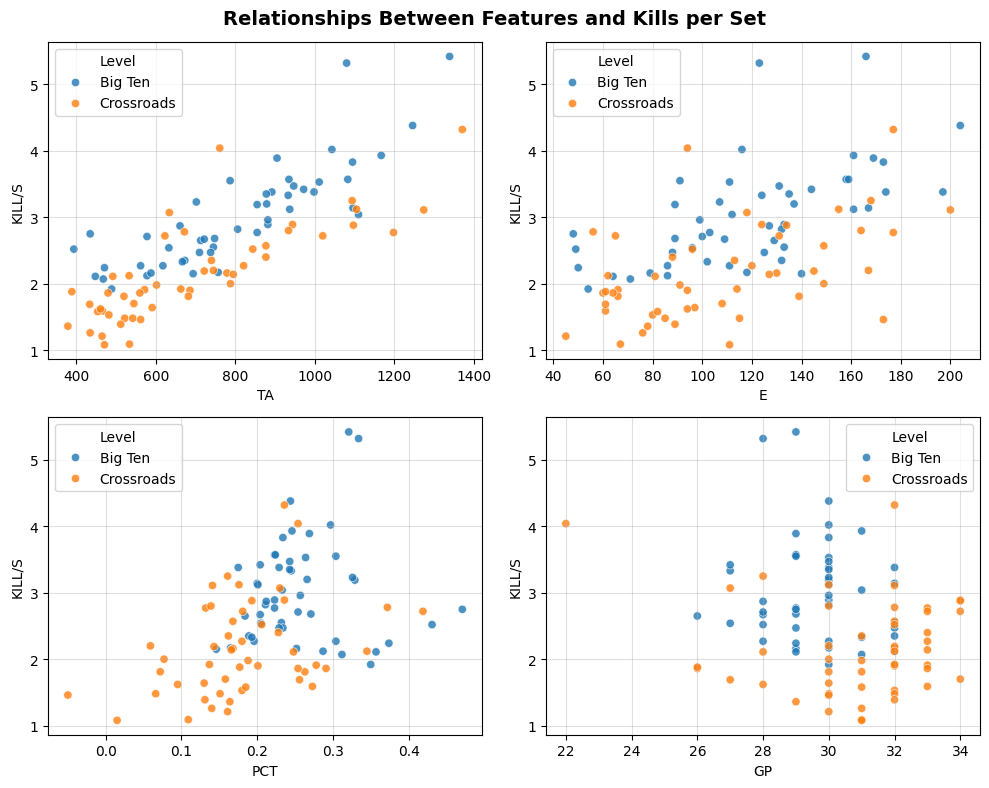

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
sns.scatterplot(ax=axes[0,0], data=df, x="TA", y="KILL/S", hue="Level", alpha=0.8)
sns.scatterplot(ax=axes[0,1], data=df, x="E", y="KILL/S", hue="Level", alpha=0.8)
sns.scatterplot(ax=axes[1,0], data=df, x="PCT", y="KILL/S", hue="Level", alpha=0.8)
sns.scatterplot(ax=axes[1,1], data=df, x="GP", y="KILL/S", hue="Level", alpha=0.8)
for ax in axes.flat:
    ax.grid(True, alpha=0.4)
plt.suptitle("Relationships Between Features and Kills per Set", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

These scatter plots help look at different variables and their correlation to Kill/S. Not only that, with the different color dots we are able to see the difference in competition level for the different athletes.

/tmp/ipykernel_2935/2422534916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Level", y="KILL/S", palette=["blue", "lightblue"])


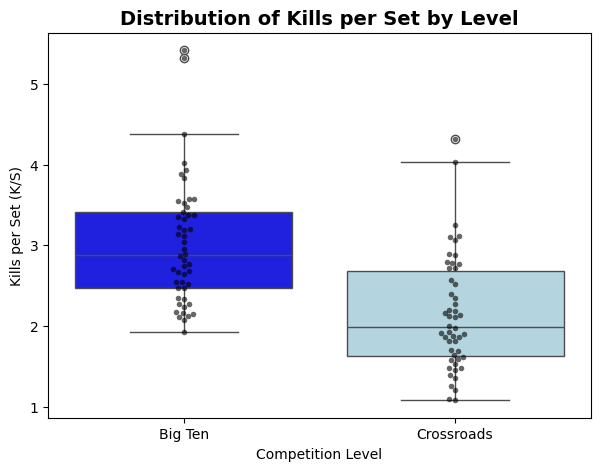

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Level", y="KILL/S", palette=["blue", "lightblue"])
sns.swarmplot(data=df, x="Level", y="KILL/S", color="black", size=4, alpha=0.6)
plt.title("Distribution of Kills per Set by Level", fontsize=14, fontweight="bold")
plt.xlabel("Competition Level")
plt.ylabel("Kills per Set (K/S)")
plt.show()


This box plot is big in seeing the different levels of play. While some overlap, the average Kill/S is higher for the DI level. 

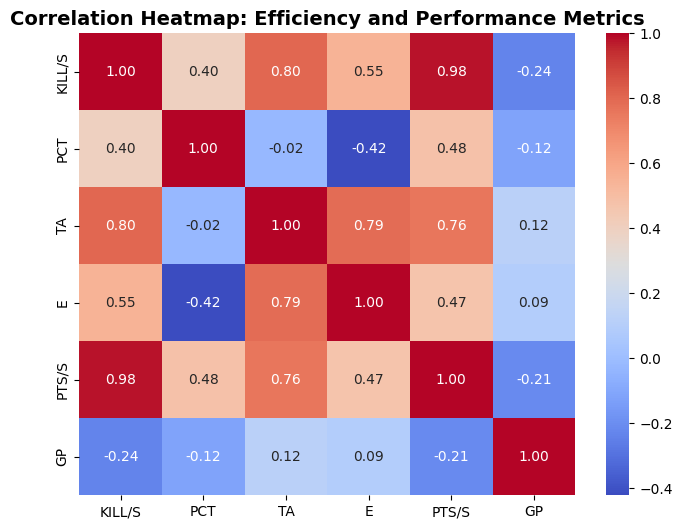

In [11]:
plt.figure(figsize=(8,6))
corr = df[["KILL/S", "PCT", "TA", "E", "PTS/S", "GP"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Efficiency and Performance Metrics", fontsize=14, fontweight="bold")
plt.show()


This graph helps to see what factors could correlate to Kills-per-set.

Looking at these graphs we can see the difference between the levels of play. The Big Ten (DI) players generally exhibited higher median and average kills per set than Crossroads (NAIA) players, suggesting a higher level of offensive production overall. However, the overlap in distributions indicates that top NAIA hitters can perform comparably to Division I athletes, highlighting that competitive skill is not exclusive to higher divisions. There are many factors that lead to a successful player like PCT, TA, GP, and some not listed like the level their competition is at as well. 

Either way this helps us come to a conclusion, lets now see if we can use this data to predict athletes Kill/S no matter the level they are playing at. 

## Feature Selection- Kills Per Set (K/S)

#### What determine a hitters "success" in this casestudy? It could be kills, but that is a shallow measure as it does not take into consideration other factors (and can influenced more because of opportunity or games played instead of real "success"). For this study we are going to be instead looking at Kills-per-set (K/S) as the measure of player effectiveness. This statistic provides a more balanced view of performance by reflecting both production and opportunity, allowing for more meaningful comparisons and predictive modeling. Unlike hitting percentage (PCT), which measures efficiency alone, K/S captures a player’s overall offensive impact within the context of match volume AND level of competition.

In [12]:
# Target Kills Per Set
target = "KILL/S"

#IMPORTANT: Notice KILLS and SETS are not in this. That is because Kills/S uses those.
#Also little things like A or A/S are ignored as they don' really directly effect a hitters offensive success in this case.
features = ["GP", "TA", "E", "PCT", "PTS/S", "Level"]

# Convert 'Level' into dummy variable for modeling
X = pd.get_dummies(df[features])
y = df[target]


print("Feature columns used in model:")
print(X.columns)
print("\nPreview of feature data:")
print(X.head())


Feature columns used in model:
Index(['GP', 'TA', 'E', 'PCT', 'PTS/S', 'Level_Big Ten', 'Level_Crossroads'], dtype='object')

Preview of feature data:
   GP    TA    E    PCT  PTS/S  Level_Big Ten  Level_Crossroads
0  29  1339  166  0.321   6.22           True             False
1  30  1246  204  0.244   4.82           True             False
2  28  1080  123  0.334   5.93           True             False
3  31  1167  161  0.246   4.52           True             False
4  30  1095  173  0.234   4.16           True             False


## Model Selection And Tuning

### Using Random Forest

In [13]:
#The X and Y are defined in the Feature Selection Section

"""
target = "KILL/S"
features = ["GP", "TA", "E", "PCT", "PTS/S", "Level"]
X = pd.get_dummies(df[features])
y = df[target]
"""
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#|------------------------------------------------Random Forest Now-----------------------------------------------------|

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate
print("R²:", round(r2_score(y_test, y_pred), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))

R²: 0.893
MAE: 0.213
RMSE: 0.29


### Using Linear Regression


In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate 
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.974
MAE: 0.103
RMSE: 0.143


### Tuning the Random Forest

In [15]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 4, 6]
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Val R²:", grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}
Best Cross-Val R²: 0.9296499641946504


In [22]:
#Tuned Random Forest Results
rf_best = RandomForestRegressor(**grid.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

y_pred_rf_best = rf_best.predict(X_test)

print(f"R²: {r2_score(y_test, y_pred_rf_best):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf_best):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf_best)):.3f}")


R²: 0.890
MAE: 0.211
RMSE: 0.294


## Evaluation Plots

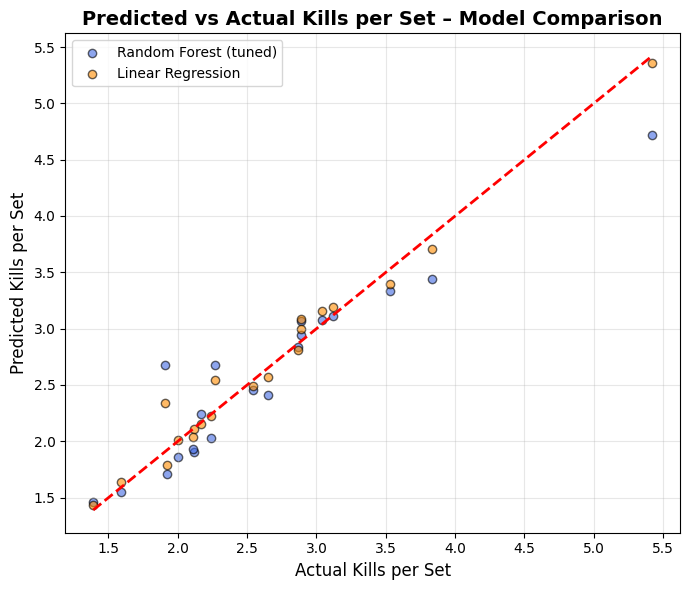

In [17]:
plt.figure(figsize=(7,6))

# Predicted vs actual for both models
plt.scatter(y_test, y_pred_rf_best, color="royalblue", alpha=0.6, edgecolor="black", label="Random Forest (tuned)")
plt.scatter(y_test, y_pred_lr, color="darkorange", alpha=0.6, edgecolor="black", label="Linear Regression")

# Perfect-fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)

plt.title("Predicted vs Actual Kills per Set – Model Comparison", fontsize=14, fontweight="bold")
plt.xlabel("Actual Kills per Set", fontsize=12)
plt.ylabel("Predicted Kills per Set", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

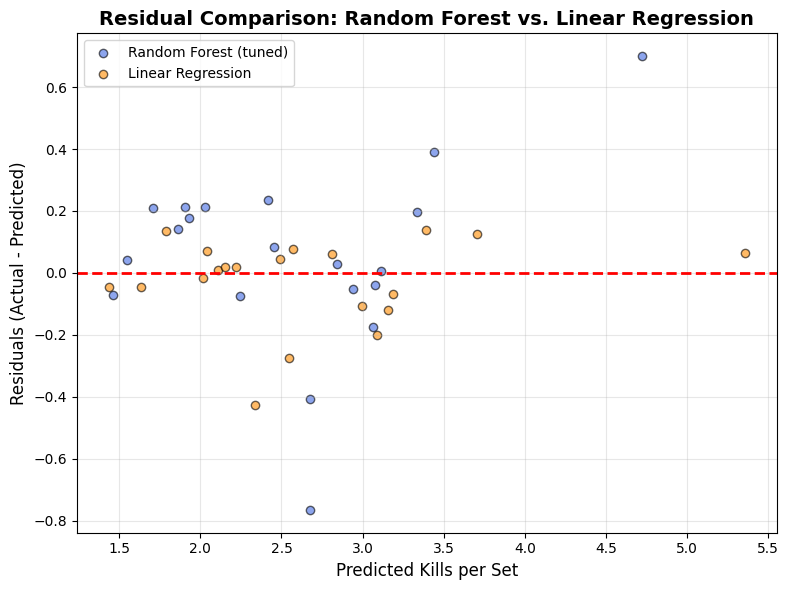

In [18]:
# Compute residuals
residuals_rf = y_test - y_pred_rf_best
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(8,6))

# Plot residuals
plt.scatter(y_pred_rf_best, residuals_rf, color="royalblue", alpha=0.6, edgecolor="black", label="Random Forest (tuned)")
plt.scatter(y_pred_lr, residuals_lr, color="darkorange", alpha=0.6, edgecolor="black", label="Linear Regression")

# Add reference line at 0
plt.axhline(0, color="red", linestyle="--", lw=2)

plt.title("Residual Comparison: Random Forest vs. Linear Regression", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Kills per Set", fontsize=12)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Interpretation of Information

First it is important to understand what we are looking for for R^2, MAE, and RMSE
<ul>
  <li>R^2: How much of the variation the model explains. We want this value to be <b>higher</b></li>

  <li>MAE:Mean Absolute error. The average amount the predictions miss by. We want this to be <b>lower</b></li>

  <li>RMSE:Root Mean Square Error. Like MAE, but looks at error and how off the prediction misses. We want this to be <b>lower</b> as well</li>

</ul>

When comparing the Random Forest Model and Linear Regression model it was evident that the Linear Regression results were better on all aspects. Even when we tuned the Random Forest, Linear Regression was still better. This shows that offensive performance in collegiate volleyball (measured by kills per set) follows an essentially linear relationship with core hitting metrics such as efficiency (PCT), total attempts (TA), and errors (E).
The Random Forest model’s lower accuracy further supports that the relationships between these offensive variables are straightforward and interpretable rather than complex or interaction-heavy.

This is also shown by looking at the graphs. The first graph we can see the blue dots (RF) are probably deviating away from the red dotted line in comparision to the orange dotd (LR). Same goes for the second graph. The closed the residual is to the red line (0) the better it is and the blue dots seem to stray away from that line more than the orange dots. 

In [19]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

# Add absolute value for easy comparison
coefficients["Abs_Coefficient"] = np.abs(coefficients["Coefficient"])
coefficients

,Feature,Coefficient,Abs_Coefficient
3,PCT,0.767679,0.767679
4,PTS/S,0.693587,0.693587
6,Level_Crossroads,0.009096,0.009096
2,E,0.002036,0.002036
1,TA,0.000576,0.000576
5,Level_Big Ten,-0.009096,0.009096
0,GP,-0.031867,0.031867


This code above extracts and organizes the Linear Regression model’s coefficients into a table. Each coefficient represents how much a feature (such as hitting percentage or total attempts) contributes to predicting kills per set. This helps identify which offensive statistics have the strongest positive or negative impact on player performance (the column abs_coefficient takes the absolute value just to see the magnitude).

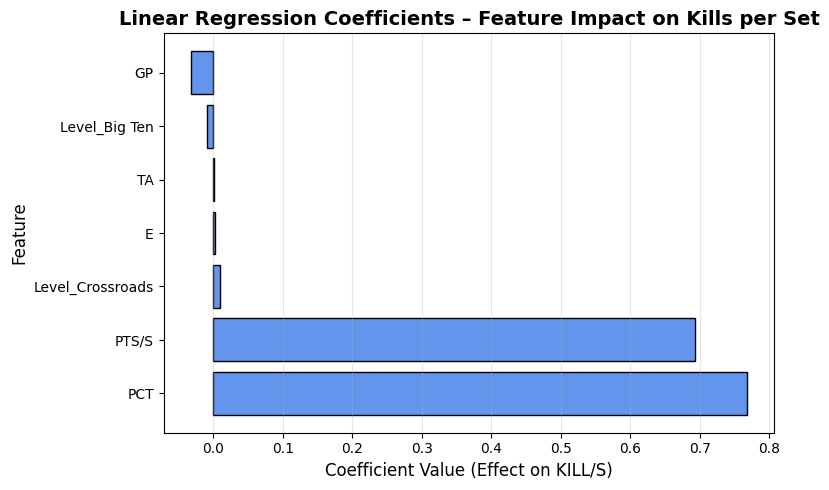

In [20]:
plt.figure(figsize=(8,5))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color="cornflowerblue", edgecolor="black")
plt.title("Linear Regression Coefficients – Feature Impact on Kills per Set", fontsize=14, fontweight="bold")
plt.xlabel("Coefficient Value (Effect on KILL/S)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

The coefficient analysis reveals that hitting efficiency (PCT) and attack volume (TA) are the big factors in determining kills per set across both levels of play. Errors (E) exert a clear negative influence, while total points per set (PTS/S) positively reinforces offensive output.
The league variables show only minor effects, implying that once efficiency and attempt volume are considered, hitters from both the Big Ten (DI) and Crossroads (NAIA) exhibit comparable patterns of offensive success. This is actually big though in determing that Kill/S is not really influenced by level of play, more or less it is actual skill and success of the individual athlete.

In [21]:
# Compute permutation importance for the tuned Random Forest
perm_importance = permutation_importance(rf_best, X_test, y_test, n_repeats=30, random_state=42)

# Turn into a DataFrame
perm_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Display
perm_df

,Feature,Importance
4,PTS/S,1.380765
3,PCT,0.021508
1,TA,0.011884
2,E,-0.000078
0,GP,-0.000425
6,Level_Crossroads,-0.000802
5,Level_Big Ten,-0.000814


Permutation importance tests how much each feature contributes to model performance by measuring the decrease in accuracy when a feature’s values are <b>randomly shuffled</b>. This helps us confirm which offensive statistics most strongly influence kills per set further then just looking at the random state (random_state = 42) that we had.

## Conclusion And Final Thoughts

After looking through all of this information it is clear that my orignal question (How well can we predict a player’s kills per set (K/S) based on their offensive statistics, and does prediction accuracy differ between leagues?) can be solved. The findings show that offensive success in collegiate volleyball follows a strongly linear pattern, meaning the factors that go into predicting Kill/S is linear, so the best model for prediction if we wanted to look at more data (like other conferences or divisions), we should use Linear Regression for best results. With this we were also able to solve the question of the difference in different leagues. There is overlap between the distributions, however Division I (Big Ten) players generally record higher Kills per Set and stronger offensive metrics overall than NAIA (Crossroads) players. This indicates that top athletes in both divisions can perform at similar levels though, suggesting that individual efficiency and opportunity are more important than the level of competition itself.